<a href="https://colab.research.google.com/github/isabelacorsi/Teste_Smarkio/blob/main/item3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install -U scikit-learn

In [3]:
import pandas as pd #biblioteca para manipulaçao dos dados
from sklearn.model_selection import train_test_split #função para separar teste e treino
from sklearn.tree import DecisionTreeClassifier #biblioteca para o classificador Arvore De Decsião
#biblioteca para as métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score 
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix #métrica matriz de confusão 
import seaborn as sn #biblioteca para mostra a matriz de confusão

In [4]:
data = pd.read_excel('Analise_ML.xlsx') #importação dos dados utilizando read_excel do pandas
pred = data.iloc[600: , 0] #armazenando os valores que possuem o status revision da coluna Pred_class
true = data.iloc[600: , 3] #armazenando os valores que possuem status revision da coluna True_class
y = true.fillna(value=pred) #preenchimento dos valores nulos 

In [5]:
p = pred.to_numpy()  #mudando para array
x = p.reshape(-1,1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) #divisão dos casos de teste (30%) e treino (70%)

In [8]:
clf = DecisionTreeClassifier() #criando o classificador
clf.fit(X_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
previsto = clf.predict(X_test) #valores que foram previstos pelo classifcador

r = y_test.to_numpy()
real = r.reshape(-1,1)

for i in range(13):
  print("Valor Previsto: [" , previsto[i],"]", "    Valor real:", real[i])

Valor Previsto: [ 4.0 ]     Valor real: [4.]
Valor Previsto: [ 43.0 ]     Valor real: [43.]
Valor Previsto: [ 2.0 ]     Valor real: [2.]
Valor Previsto: [ 25.0 ]     Valor real: [25.]
Valor Previsto: [ 84.0 ]     Valor real: [86.]
Valor Previsto: [ 96.0 ]     Valor real: [96.]
Valor Previsto: [ 3.0 ]     Valor real: [3.]
Valor Previsto: [ 113.0 ]     Valor real: [114.]
Valor Previsto: [ 55.0 ]     Valor real: [55.]
Valor Previsto: [ 4.0 ]     Valor real: [4.]
Valor Previsto: [ 3.0 ]     Valor real: [3.]
Valor Previsto: [ 39.0 ]     Valor real: [39.]
Valor Previsto: [ 77.0 ]     Valor real: [77.]


### Métricas


*   Matriz de confusão
*   Accuracy
* Recall
* Precision

*    F1_score
* Classification_report


In [18]:
print("Accurancy: {0:.4f}%".format(accuracy_score(y_test,previsto)*100),"dos dados de teste estão corretos.")

Accurancy: 84.6154% dos dados de teste estão corretos.


In [13]:
print("Precision com average = 'micro': {0:.4f}%".format(precision_score(y_test, previsto, average='micro')*100))
print("Precision com average = 'macro': {0:.4f}%".format(precision_score(y_test, previsto, average='macro', zero_division=0)*100))

Precision com average = 'micro': 84.6154%
Precision com average = 'macro': 69.2308%


In [14]:
print("Recall com average = 'micro': {0:.4f}%".format(recall_score(y_test, previsto, average='micro')*100))
print("Recall com average = 'macro': {0:.4f}%".format(recall_score(y_test, previsto, average='macro',zero_division=0)*100))

Recall com average = 'micro': 84.6154%
Recall com average = 'macro': 69.2308%


In [15]:
print("F1_score com average = 'micro': {0:.4f}%".format(f1_score(y_test, previsto, average='micro')*100))
print("F1_score com average = 'macro': {0:.4f}%".format(f1_score(y_test, previsto, average='macro', zero_division=0)*100))

F1_score com average = 'micro': 84.6154%
F1_score com average = 'macro': 69.2308%


In [ ]:
report = classification_report(y_test, previsto)
print(report)

              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00         1
         3.0       1.00      1.00      1.00         2
         4.0       1.00      1.00      1.00         2
        25.0       1.00      1.00      1.00         1
        39.0       1.00      1.00      1.00         1
        43.0       1.00      1.00      1.00         1
        55.0       1.00      1.00      1.00         1
        77.0       1.00      1.00      1.00         1
        84.0       0.00      0.00      0.00         0
        86.0       0.00      0.00      0.00         1
        96.0       1.00      1.00      1.00         1
       113.0       0.00      0.00      0.00         0
       114.0       0.00      0.00      0.00         1

    accuracy                           0.85        13
   macro avg       0.69      0.69      0.69        13
weighted avg       0.85      0.85      0.85        13



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


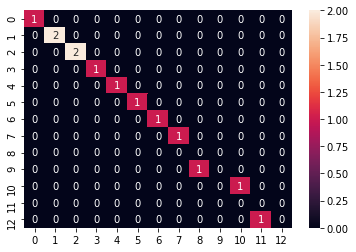

In [ ]:
matconf = confusion_matrix(y_test, previsto)
sn.heatmap(matconf,annot=True )